In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\Google_Stock_Price_Train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [4]:
df1=df.reset_index()['Open']
df1

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

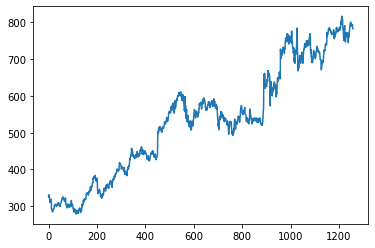

In [5]:
plt.plot(df.Open)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
print(df1)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [8]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [9]:
training_size,test_size

(817, 441)

In [10]:
train_data

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

## convert an array of values into a dataset matrix

In [11]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [14]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 18s 605ms/step - loss: 0.0929 - val_loss: 0.0214
Epoch 2/100
12/12 [==============================] - 3s 267ms/step - loss: 0.0072 - val_loss: 0.0128
Epoch 3/100
12/12 [==============================] - 3s 271ms/step - loss: 0.0049 - val_loss: 0.0302
Epoch 4/100
12/12 [==============================] - 3s 288ms/step - loss: 0.0023 - val_loss: 0.0071
Epoch 5/100
12/12 [==============================] - 3s 285ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 6/100
12/12 [==============================] - 3s 290ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 7/100
12/12 [==============================] - 4s 296ms/step - loss: 9.4539e-04 - val_loss: 0.0046
Epoch 8/100
12/12 [==============================] - 4s 297ms/step - loss: 0.0010 - val_loss: 0.0053
Epoch 9/100
12/12 [==============================] - 4s 300ms/step - loss: 9.8016e-04 - val_loss: 0.0045
Epoch 10/100
12/12 [==============================] - 4s 304ms/step - loss: 9.6202

12/12 [==============================] - 4s 345ms/step - loss: 4.8440e-04 - val_loss: 0.0026
Epoch 79/100
12/12 [==============================] - 4s 349ms/step - loss: 4.5380e-04 - val_loss: 0.0019
Epoch 80/100
12/12 [==============================] - 4s 347ms/step - loss: 4.4676e-04 - val_loss: 0.0023
Epoch 81/100
12/12 [==============================] - 4s 351ms/step - loss: 3.8131e-04 - val_loss: 0.0032
Epoch 82/100
12/12 [==============================] - 4s 357ms/step - loss: 4.3655e-04 - val_loss: 0.0017
Epoch 83/100
12/12 [==============================] - 4s 346ms/step - loss: 4.0579e-04 - val_loss: 0.0019
Epoch 84/100
12/12 [==============================] - 4s 352ms/step - loss: 4.3779e-04 - val_loss: 0.0010
Epoch 85/100
12/12 [==============================] - 5s 389ms/step - loss: 4.8203e-04 - val_loss: 0.0017
Epoch 86/100
12/12 [==============================] - 4s 369ms/step - loss: 4.1011e-04 - val_loss: 0.0030
Epoch 87/100
12/12 [==============================] - 4s 37

In [20]:
import tensorflow as tf

In [21]:
tf.__version__

'2.4.1'

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

481.27903822752353

In [25]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

719.509759570844

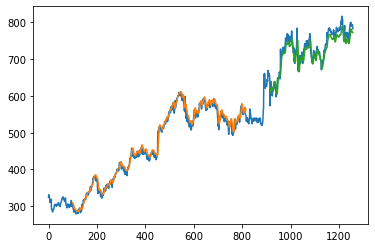

In [26]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
len(test_data)

441

In [28]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [30]:
temp_input

[0.9387417218543046,
 0.9410670436788453,
 0.9345561425701316,
 0.9387417218543046,
 0.9323238336185729,
 0.9267802663888685,
 0.9317843589552794,
 0.922464469082521,
 0.9192462236773569,
 0.9233573926631446,
 0.9142421311109459,
 0.9075824094054619,
 0.9113029243247266,
 0.9108192573852221,
 0.9119168092864054,
 0.9076010119800582,
 0.9117679886896346,
 0.9187625567378526,
 0.9195810700200908,
 0.9317657563806832,
 0.9291427933626015,
 0.9133492075303222,
 0.8855011533596251,
 0.9028945606071881,
 0.8938351067787782,
 0.8999367512463725,
 0.9126981174194508,
 0.9176650048366695,
 0.9113029243247266,
 0.9181114666269812,
 0.9317657563806832,
 0.9440248530396609,
 0.936862861820076,
 0.9233945978123372,
 0.9277662028424736,
 0.9344445271225539,
 0.9249386115038323,
 0.9210692759877968,
 0.9243805342659424,
 0.9304821787335367,
 0.9299054989210507,
 0.9311332688444081,
 0.927505766798125,
 0.9441550710618349,
 0.9387603244289009,
 0.9340352704814348,
 0.9348351811890765,
 0.9313937048887

In [31]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9096536]
101
1 day input [0.94106704 0.93455614 0.93874172 0.93232383 0.92678027 0.93178436
 0.92246447 0.91924622 0.92335739 0.91424213 0.90758241 0.91130292
 0.91081926 0.91191681 0.90760101 0.91176799 0.91876256 0.91958107
 0.93176576 0.92914279 0.91334921 0.88550115 0.90289456 0.89383511
 0.89993675 0.91269812 0.917665   0.91130292 0.91811147 0.93176576
 0.94402485 0.93686286 0.9233946  0.9277662  0.93444453 0.92493861
 0.92106928 0.92438053 0.93048218 0.9299055  0.93113327 0.92750577
 0.94415507 0.93876032 0.93403527 0.93483518 0.9313937  0.94636878
 0.96569685 0.97510976 0.95966962 0.97808617 1.         0.98076494
 0.97083116 0.98450406 0.96054394 0.9371419  0.92841729 0.90804747
 0.8771858  0.92153434 0.93809063 0.93165414 0.95254483 0.88812412
 0.88637547 0.87032145 0.88563137 0.90743359 0.91571173 0.89941588
 0.91805566 0.9089404  0.9024853  0.89456061 0.91600938 0.9132934
 0.88979835 0.86589404 0.89030062 0.90335962 0.89642086 0.91777662
 0.93176576 0.94114145 0.95762334 0

8 day output [[0.8249177]]
9 day input [0.92335739 0.91424213 0.90758241 0.91130292 0.91081926 0.91191681
 0.90760101 0.91176799 0.91876256 0.91958107 0.93176576 0.92914279
 0.91334921 0.88550115 0.90289456 0.89383511 0.89993675 0.91269812
 0.917665   0.91130292 0.91811147 0.93176576 0.94402485 0.93686286
 0.9233946  0.9277662  0.93444453 0.92493861 0.92106928 0.92438053
 0.93048218 0.9299055  0.93113327 0.92750577 0.94415507 0.93876032
 0.93403527 0.93483518 0.9313937  0.94636878 0.96569685 0.97510976
 0.95966962 0.97808617 1.         0.98076494 0.97083116 0.98450406
 0.96054394 0.9371419  0.92841729 0.90804747 0.8771858  0.92153434
 0.93809063 0.93165414 0.95254483 0.88812412 0.88637547 0.87032145
 0.88563137 0.90743359 0.91571173 0.89941588 0.91805566 0.9089404
 0.9024853  0.89456061 0.91600938 0.9132934  0.88979835 0.86589404
 0.89030062 0.90335962 0.89642086 0.91777662 0.93176576 0.94114145
 0.95762334 0.96413424 0.96402262 0.96971501 0.95077759 0.96294367
 0.96123223 0.95475854 0

 0.78729779 0.7828086  0.77862257 0.77467918]
18 day output [[0.7709278]]
19 day input [0.93176576 0.92914279 0.91334921 0.88550115 0.90289456 0.89383511
 0.89993675 0.91269812 0.917665   0.91130292 0.91811147 0.93176576
 0.94402485 0.93686286 0.9233946  0.9277662  0.93444453 0.92493861
 0.92106928 0.92438053 0.93048218 0.9299055  0.93113327 0.92750577
 0.94415507 0.93876032 0.93403527 0.93483518 0.9313937  0.94636878
 0.96569685 0.97510976 0.95966962 0.97808617 1.         0.98076494
 0.97083116 0.98450406 0.96054394 0.9371419  0.92841729 0.90804747
 0.8771858  0.92153434 0.93809063 0.93165414 0.95254483 0.88812412
 0.88637547 0.87032145 0.88563137 0.90743359 0.91571173 0.89941588
 0.91805566 0.9089404  0.9024853  0.89456061 0.91600938 0.9132934
 0.88979835 0.86589404 0.89030062 0.90335962 0.89642086 0.91777662
 0.93176576 0.94114145 0.95762334 0.96413424 0.96402262 0.96971501
 0.95077759 0.96294367 0.96123223 0.95475854 0.95204256 0.95163331
 0.95725128 0.93796041 0.93688146 0.9096536

27 day output [[0.7422154]]
28 day input [0.91130292 0.91811147 0.93176576 0.94402485 0.93686286 0.9233946
 0.9277662  0.93444453 0.92493861 0.92106928 0.92438053 0.93048218
 0.9299055  0.93113327 0.92750577 0.94415507 0.93876032 0.93403527
 0.93483518 0.9313937  0.94636878 0.96569685 0.97510976 0.95966962
 0.97808617 1.         0.98076494 0.97083116 0.98450406 0.96054394
 0.9371419  0.92841729 0.90804747 0.8771858  0.92153434 0.93809063
 0.93165414 0.95254483 0.88812412 0.88637547 0.87032145 0.88563137
 0.90743359 0.91571173 0.89941588 0.91805566 0.9089404  0.9024853
 0.89456061 0.91600938 0.9132934  0.88979835 0.86589404 0.89030062
 0.90335962 0.89642086 0.91777662 0.93176576 0.94114145 0.95762334
 0.96413424 0.96402262 0.96971501 0.95077759 0.96294367 0.96123223
 0.95475854 0.95204256 0.95163331 0.95725128 0.93796041 0.93688146
 0.9096536  0.90057594 0.88901639 0.87684178 0.86495399 0.85371923
 0.8432765  0.83367485 0.82491767 0.81697839 0.80980593 0.80333245
 0.79747915 0.79216188 

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [33]:
len(df1)


1258

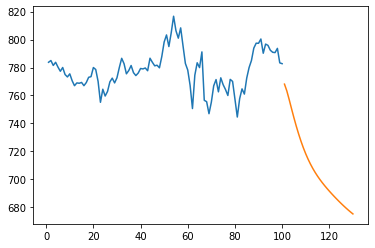

In [34]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

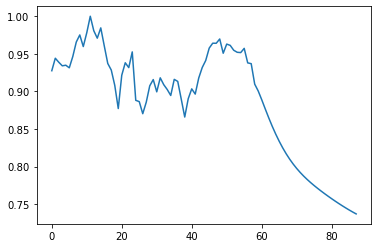

In [35]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [36]:
df3=scaler.inverse_transform(df3).tolist()

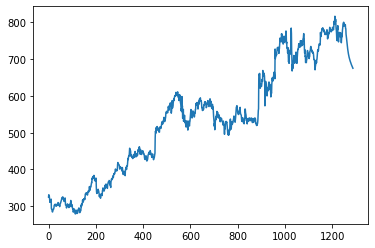

In [37]:
plt.plot(df3)